In [ ]:
pip install geopandas


In [5]:
import warnings
warnings.filterwarnings('ignore')
import requests
import folium
import urllib
from pandas.io.json import json_normalize
import pandas as pd
import folium
from geopandas import GeoDataFrame
from shapely.geometry import Point

In [11]:
# Get URL
dataset_url = "https://s3-us-west-2.amazonaws.com/usgs-lidar-public/IA_FullState/ept.json"


In [12]:
dataset_url

'https://s3-us-west-2.amazonaws.com/usgs-lidar-public/IA_FullState/ept.json'

In [13]:
data = requests.get(dataset_url)
data

<Response [200]>

In [14]:
type(data.json())

dict

In [16]:
data.json()

{'bounds': [-10758075, 4793202, -361911, -10034133, 5517144, 362031],
 'boundsConforming': [-10758074, 4920531, -1897, -10034134, 5389814, 2017],
 'dataType': 'laszip',
 'hierarchyType': 'json',
 'points': 167692896718,
 'reprojection': {'in': 'EPSG:26915', 'out': 'EPSG:3857'},
 'schema': [{'name': 'X',
   'offset': -10396104,
   'scale': 0.01,
   'size': 4,
   'type': 'signed'},
  {'name': 'Y', 'offset': 5155173, 'scale': 0.01, 'size': 4, 'type': 'signed'},
  {'name': 'Z', 'offset': 60, 'scale': 0.01, 'size': 4, 'type': 'signed'},
  {'name': 'Intensity', 'size': 2, 'type': 'unsigned'},
  {'name': 'ReturnNumber', 'size': 1, 'type': 'unsigned'},
  {'name': 'NumberOfReturns', 'size': 1, 'type': 'unsigned'},
  {'name': 'ScanDirectionFlag', 'size': 1, 'type': 'unsigned'},
  {'name': 'EdgeOfFlightLine', 'size': 1, 'type': 'unsigned'},
  {'name': 'Classification', 'size': 1, 'type': 'unsigned'},
  {'name': 'ScanAngleRank', 'size': 4, 'type': 'float'},
  {'name': 'UserData', 'size': 1, 'type'

In [18]:
result = json_normalize(data.json())
result

,bounds,boundsConforming,dataType,hierarchyType,points,schema,version,span,reprojection.in,reprojection.out,srs.authority,srs.horizontal,srs.wkt
0,"[-10758075, 4793202, -361911, -10034133, 55171...","[-10758074, 4920531, -1897, -10034134, 5389814...",laszip,json,167692896718,"[{'name': 'X', 'offset': -10396104, 'scale': 0...",1.1.0,256,EPSG:26915,EPSG:3857,EPSG,3857,"PROJCS[""WGS 84 / Pseudo-Mercator"",GEOGCS[""WGS ..."


In [24]:
import geopandas as gpd
from shapely.geometry import Polygon
MINX, MINY, MAXX, MAXY = [-93.756155, 41.918015, -93.747334, 41.921429]
polygon = Polygon(((MINX, MINY), (MINX, MAXY), (MAXX, MAXY), (MAXX, MINY), (MINX, MINY)))

grid = gpd.GeoDataFrame([polygon], columns=["geometry"])
grid.set_crs(epsg=4326, inplace=True)

,geometry
0,"POLYGON ((-93.75616 41.91801, -93.75616 41.921..."


In [27]:
#write back to file
grid.to_file("iowa.geojson", driver="GeoJSON")

In [30]:
#creating additional features
grid['boundary'] = grid.boundary
grid["area"] = grid.area
grid['centroid'] = grid.centroid

In [31]:
grid

,geometry,boundary,area,centroid
0,"POLYGON ((-93.75616 41.91801, -93.75616 41.921...","LINESTRING (-93.75616 41.91801, -93.75616 41.9...",0.00003,POINT (-93.75174 41.91972)


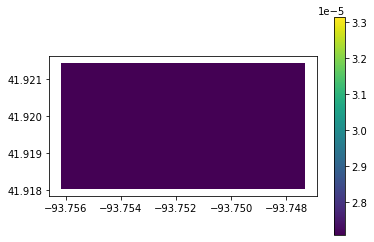

In [32]:
grid.plot("area", legend=True)

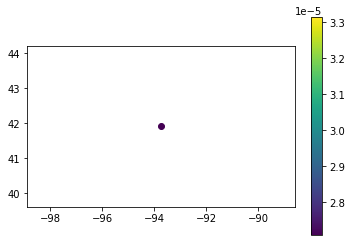

In [34]:
grid1 = grid.set_geometry("centroid")
grid1.plot("area", legend=True)

In [35]:
grid.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich